# Clasificador de Tweets
- Irving Acosta 22781
- Ricardo Chuy 

Cargar la data.


In [ ]:
from pathlib import Path
import pandas as pd

candidate = Path("train.csv")

if candidate.exists():
    df = pd.read_csv(candidate)
    print("Dimensiones:", df.shape)
    display(df.head())


Candidate: train.csv
Existe?: True
Usando candidate directamente.
Dimensiones: (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
import pandas as pd
from IPython.display import display

print("Shape:", df.shape)
print("\nColumnas:", df.columns.tolist(), "\n")
display(df.head(6))

print("\nInfo resumida:")
df.info()

print("\nValores nulos por columna:\n", df.isna().sum())
print("\nDuplicados (filas):", df.duplicated().sum())

if 'target' in df.columns:
    print("\nDistribución target:")
    print(df['target'].value_counts(dropna=False))

df['text_len'] = df['text'].astype(str).str.len()
print("\nEstadísticas de longitud de texto:")
print(df['text_len'].describe())
display(df[['text','target','text_len']].sample(6, random_state=42))


Shape: (7613, 5)

Columnas: ['id', 'keyword', 'location', 'text', 'target'] 



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1



Info resumida:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB

Valores nulos por columna:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Duplicados (filas): 0

Distribución target:
target
0    4342
1    3271
Name: count, dtype: int64

Estadísticas de longitud de texto:
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_len, dtype: float64


,text,target,text_len
2644,So you have a new weapon that can cause un-ima...,1,66
2227,The f$&amp;@ing things I do for #GISHWHES Just...,0,119
5448,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1,125
132,Aftershock back to school kick off was great. ...,0,114
6845,in response to trauma Children of Addicts deve...,0,105
5559,@Calum5SOS you look like you got caught in a r...,0,102


## Limpieza

In [ ]:
import re, html
import pandas as pd

def clean_text_basic(text):
    if pd.isna(text):
        return ""
    s = str(text)
    # decode html entities
    s = html.unescape(s)
    # remove urls
    s = re.sub(r'http\S+|www\.\S+', ' ', s)
    # remove mentions
    s = re.sub(r'@\w+', ' ', s)
    # remove hashtag symbol but keep the word (e.g. #help -> help)
    s = re.sub(r'#', '', s)
    # replace punctuation with space (preserve unicode word characters)
    s = re.sub(r'[^\w\s]', ' ', s)
    # lowercase
    s = s.lower()
    # collapse whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    return s

# Aplica la limpieza y crea columna nueva
df['clean_text'] = df['text'].apply(clean_text_basic)

# Vista rápida para comprobar
display(df[['text','clean_text']].head(8))
print("\nEjemplo (original -> limpio):")
for i, row in df[['text','clean_text']].sample(5, random_state=1).iterrows():
    print(f"- [{i}] {row['text'][:80]!s} -> {row['clean_text'][:80]!s}")


,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfires evacuation ord...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as s...
5,#RockyFire Update => California Hwy. 20 closed...,rockyfire update california hwy 20 closed in b...
6,#flood #disaster Heavy rain causes flash flood...,flood disaster heavy rain causes flash floodin...
7,I'm on top of the hill and I can see a fire in...,i m on top of the hill and i can see a fire in...



Ejemplo (original -> limpio):
- [3228] Goulburn man Henry Van Bilsen missing: Emergency services are searching for a Go -> goulburn man henry van bilsen missing emergency services are searching for a gou
- [3706] The things we fear most in organizations--fluctuations disturbances imbalances-- -> the things we fear most in organizations fluctuations disturbances imbalances ar
- [6957] @tsunami_esh ?? hey Esh -> hey esh
- [2887] @POTUS you until you drown by water entering the lungs. You being alive has caus -> you until you drown by water entering the lungs you being alive has caused this 
- [7464] Crawling in my skin
These wounds they will not hea -> crawling in my skin these wounds they will not hea


In [ ]:
import pandas as pd
import sys

try:
    import spacy
except Exception:
    print("Instalando spaCy...")
    !pip install -q spacy
    import spacy

try:
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
except Exception:
    print("Descargando modelo en_core_web_sm...")
    !python -m spacy download en_core_web_sm -q
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

from spacy.lang.en.stop_words import STOP_WORDS

# Usaremos la columna 'clean_text' (resultado de la Celda A)
if 'clean_text' not in df.columns:
    df['clean_text'] = df['text'].apply(lambda x: str(x).lower())

def lemmatize_list_of_texts(texts, batch_size=64):
    """Devuelve lista de strings lematizados y sin stopwords. Usa nlp.pipe para ser rápido."""
    out = []
    for doc in nlp.pipe(texts, batch_size=batch_size):
        lemmas = []
        for token in doc:
            # filtrar: stopwords, espacios, puntuacion, números, tokens muy cortos
            if token.is_space or token.is_punct or token.is_stop or token.like_num:
                continue
            lemma = token.lemma_.lower().strip()
            if not lemma or lemma in STOP_WORDS or len(lemma) < 2:
                continue
            lemmas.append(lemma)
        out.append(" ".join(lemmas))
    return out

# Aplica sobre la columna limpia
texts = df['clean_text'].astype(str).tolist()
df['clean_text_lem'] = lemmatize_list_of_texts(texts)

display(df[['clean_text','clean_text_lem']].head(8))
print("\nEjemplos aleatorios (clean -> lematizado):")
for i, row in df[['clean_text','clean_text_lem']].sample(6, random_state=2).iterrows():
    print(f"- [{i}] {row['clean_text'][:80]!s} -> {row['clean_text_lem'][:80]!s}")


Instalando spaCy...


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.13.0 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.2 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.2 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\irvin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Descargando modelo en_core_web_sm...
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\irvin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,clean_text,clean_text_lem
0,our deeds are the reason of this earthquake ma...,deed reason earthquake allah forgive
1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,all residents asked to shelter in place are be...,resident ask shelter place notify officer evac...
3,13 000 people receive wildfires evacuation ord...,people receive wildfire evacuation order calif...
4,just got sent this photo from ruby alaska as s...,send photo ruby alaska smoke wildfire pour school
5,rockyfire update california hwy 20 closed in b...,rockyfire update california hwy close directio...
6,flood disaster heavy rain causes flash floodin...,flood disaster heavy rain cause flash flooding...
7,i m on top of the hill and i can see a fire in...,hill fire wood



Ejemplos aleatorios (clean -> lematizado):
- [3190] practice your families fire escape plan so everyone knows what to do in case of  -> practice family fire escape plan know case emergency
- [6171] fuck sleeping with sirens -> fuck sleep siren
- [1196] i m a gemini children screaming buildings burning police sirens in the distance -> gemini child scream building burn police siren distance
- [680] montgomery come for the blazing hot weather stay for the stds yet another reject -> montgomery come blaze hot weather stay stds reject city slogan
- [3358] i got evacuated from the cinema 30 mins through inside out kill me please -> evacuate cinema min inside kill
- [6432] 25 dead in kuwait mosque suicide bombing claimed by isis offshoot on -> dead kuwait mosque suicide bombing claim isis offshoot


Top 20 unigrams — clase 1 (desastre)
            the    1364
             in    1164
              a     935
             of     928
             to     757
            and     506
             on     420
            for     401
              i     387
              s     361
             is     352
             at     308
             by     278
           from     245
             it     240
           that     210
           with     192
           this     182
           fire     182
          after     181

Top 20 unigrams — clase 0 (no desastre)
            the    1911
              i    1391
              a    1265
             to    1192
            and     920
             of     902
             in     822
            you     757
             is     598
              s     549
             my     546
             it     539
            for     493
             on     440
           that     413
           with     380
              t     338
           this     298
          

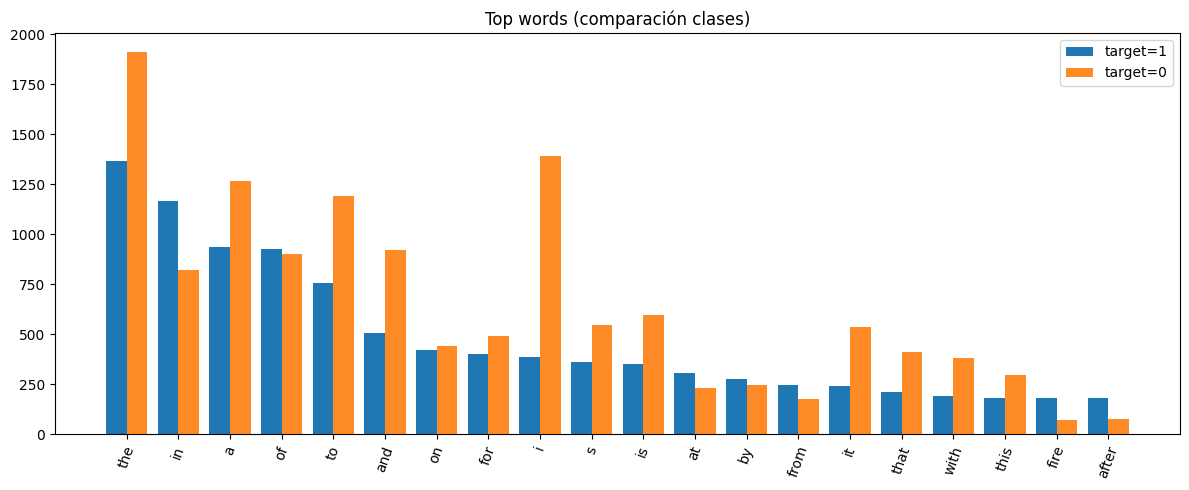


Estadísticas de longitud (clean tokens) por clase:
         count       mean       std  min   25%   50%   75%   max
target                                                          
0       4342.0  14.008982  6.478975  1.0   9.0  14.0  19.0  32.0
1       3271.0  14.414858  5.483588  1.0  10.0  14.0  18.0  34.0


<Figure size 800x400 with 0 Axes>

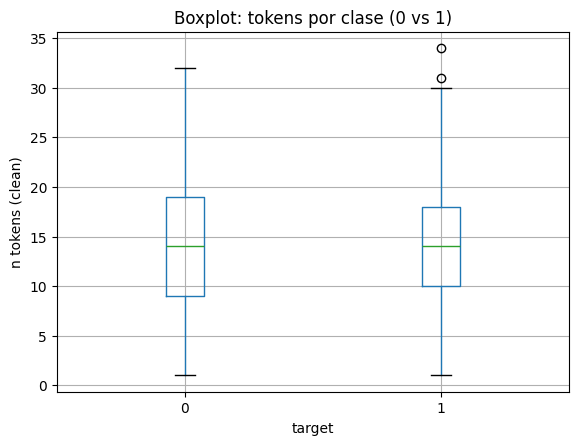


Ejemplos de tweets de clase 1 que contienen 'fire' o 'flood' (si existen):


C:\Users\irvin\AppData\Local\Temp\ipykernel_11492\2679165899.py:106: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  examples = df[(df['target']==1) & (df['clean_text'].str.contains(r'\b(fire|flood|earthquake|storm|bomb|attack)\b', regex=True, na=False))]


,text,clean_text,target
5547,Wow what beauty lies within every storm. Taken...,wow what beauty lies within every storm taken ...,1
3346,Trafford Centre film fans angry after Odeon ci...,trafford centre film fans angry after odeon ci...,1
4031,IT STARTS A FOREST FIRE THAT CANNOT BE PUT OUT...,it starts a forest fire that cannot be put out,1
6390,16yr old PKK suicide bomber who detonated bomb...,16yr old pkk suicide bomber who detonated bomb...,1
1240,someone: mentions gansey on fire\nme busting t...,someone mentions gansey on fire me busting thr...,1
3783,@BrookTekle_ didn't look like a murder scene j...,didn t look like a murder scene just 1 cops a ...,1


In [ ]:

import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

TOP_N = 20

if 'clean_text' not in df.columns:
    raise RuntimeError("No encontré df['clean_text']. Ejecuta la Celda A de limpieza primero.")

corpus = df['clean_text'].astype(str)

def top_ngrams(texts, ngram_range=(1,1), k=20):
    vec = CountVectorizer(ngram_range=ngram_range, token_pattern=r'\b\w+\b', min_df=1)
    X = vec.fit_transform(texts)
    sums = np.asarray(X.sum(axis=0)).ravel()
    terms = np.array(vec.get_feature_names_out())
    top_idx = np.argsort(sums)[::-1][:k]
    return list(zip(terms[top_idx], sums[top_idx]))

# 1) Top unigrams por clase
print("Top {} unigrams — clase 1 (desastre)".format(TOP_N))
top1 = top_ngrams(df.loc[df['target']==1,'clean_text'], ngram_range=(1,1), k=TOP_N)
for w,c in top1:
    print(f"{w:>15}  {c:>6}")

print("\nTop {} unigrams — clase 0 (no desastre)".format(TOP_N))
top0 = top_ngrams(df.loc[df['target']==0,'clean_text'], ngram_range=(1,1), k=TOP_N)
for w,c in top0:
    print(f"{w:>15}  {c:>6}")

# 2) Top bigrams y trigrams por clase
print("\nTop {} bigrams — clase 1".format(TOP_N))
for w,c in top_ngrams(df.loc[df['target']==1,'clean_text'], ngram_range=(2,2), k=TOP_N):
    print(f"{w:>30}  {c:>6}")

print("\nTop {} bigrams — clase 0".format(TOP_N))
for w,c in top_ngrams(df.loc[df['target']==0,'clean_text'], ngram_range=(2,2), k=TOP_N):
    print(f"{w:>30}  {c:>6}")

print("\nTop {} trigrams — clase 1 (breve)".format(10))
for w,c in top_ngrams(df.loc[df['target']==1,'clean_text'], ngram_range=(3,3), k=10):
    print(f"{w:>40}  {c:>6}")

# 3) Gráficos
def plot_top_compare(top_list1, top_list0, title="Top words comparison"):
    # crear dicts
    d1 = dict(top_list1)
    d0 = dict(top_list0)

    words = list(dict(top_list1 + top_list0).keys())[:TOP_N]
    vals1 = [d1.get(w,0) for w in words]
    vals0 = [d0.get(w,0) for w in words]
    x = np.arange(len(words))
    width = 0.4
    plt.figure(figsize=(12,6))
    plt.bar(x - width/2, vals1, width, label='target=1')
    plt.bar(x + width/2, vals0, width, label='target=0', alpha=0.8)
    plt.xticks(x, words, rotation=70)
    plt.ylabel("Frequency")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Tomamos los TOP_N globales (unión de tops)
global_top = list(dict(top1 + top0).keys())[:TOP_N]

def counts_for_words(texts, words):
    vec = CountVectorizer(vocabulary=words, token_pattern=r'\b\w+\b')
    X = vec.fit_transform(texts)
    return np.asarray(X.sum(axis=0)).ravel()

words = global_top
vals1 = counts_for_words(df.loc[df['target']==1,'clean_text'], words)
vals0 = counts_for_words(df.loc[df['target']==0,'clean_text'], words)

plt.figure(figsize=(12,5))
x = np.arange(len(words))
plt.bar(x-0.2, vals1, 0.4, label='target=1')
plt.bar(x+0.2, vals0, 0.4, label='target=0', alpha=0.9)
plt.xticks(x, words, rotation=70)
plt.title("Top words (comparación clases)")
plt.legend(); plt.tight_layout(); plt.show()

df['clean_len'] = df['clean_text'].str.split().apply(len)
print("\nEstadísticas de longitud (clean tokens) por clase:")
print(df.groupby('target')['clean_len'].describe())

plt.figure(figsize=(8,4))
df.boxplot(column='clean_len', by='target')
plt.title("Boxplot: tokens por clase (0 vs 1)")
plt.suptitle("")
plt.xlabel("target")
plt.ylabel("n tokens (clean)")
plt.show()

print("\nEjemplos de tweets de clase 1 que contienen 'fire' o 'flood' (si existen):")
examples = df[(df['target']==1) & (df['clean_text'].str.contains(r'\b(fire|flood|earthquake|storm|bomb|attack)\b', regex=True, na=False))]
display(examples[['text','clean_text','target']].sample(min(6,len(examples)), random_state=1))


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

col = 'clean_text_lem' if 'clean_text_lem' in df.columns else 'clean_text'
print("Usando columna:", col)

def top_ngrams_from_col(df, target_val, ngram_range=(1,1), k=20):
    texts = df.loc[df['target']==target_val, col].astype(str)
    vec = CountVectorizer(ngram_range=ngram_range, token_pattern=r'\b\w+\b', min_df=1)
    X = vec.fit_transform(texts)
    sums = np.asarray(X.sum(axis=0)).ravel()
    terms = np.array(vec.get_feature_names_out())
    idx = np.argsort(sums)[::-1][:k]
    return list(zip(terms[idx], sums[idx]))

TOP = 20
print("\n--- Top unigrams (lematizados) — target=1 ---")
for w,c in top_ngrams_from_col(df, 1, (1,1), TOP):
    print(f"{w:>18} {c:6}")

print("\n--- Top unigrams (lematizados) — target=0 ---")
for w,c in top_ngrams_from_col(df, 0, (1,1), TOP):
    print(f"{w:>18} {c:6}")

print("\n--- Top bigrams (lematizados) — target=1 ---")
for w,c in top_ngrams_from_col(df, 1, (2,2), TOP):
    print(f"{w:>30} {c:6}")

print("\n--- Top bigrams (lematizados) — target=0 ---")
for w,c in top_ngrams_from_col(df, 0, (2,2), TOP):
    print(f"{w:>30} {c:6}")

# Conteo de keywords de interés (sobre la columna lematizada)
keywords = ["fire","flood","earthquake","bomb","suicide","dead","evacuate","explosion","hurricane","storm","oil","kill"]
print("\nConteo de keywords por clase (lematizado):")
for kw in keywords:
    for t in [1,0]:
        cnt = df.loc[df['target']==t, col].str.contains(rf'\b{kw}\b', regex=True, na=False).sum()
        print(f" {kw:10} target={t}: {cnt:5}", end="  ")
    print()

sample_kw = ['fire','suicide','bomb','flood','evacuate']
print("\nEjemplos (target=1) que contienen keywords (hasta 6):")
examples = df[(df['target']==1) & df[col].str.contains('|'.join(sample_kw), na=False)]
display(examples[['text', col, 'target']].sample(min(6, len(examples)), random_state=2))


Usando columna: clean_text_lem

--- Top unigrams (lematizados) — target=1 ---
              fire    272
              kill    157
              news    138
          disaster    121
        california    115
              bomb    115
             crash    115
           suicide    112
              year    111
            police    109
            people    106
            attack    106
            family    105
              home    105
              like    101
             train    101
             storm     95
         hiroshima     92
             flood     92
          building     90

--- Top unigrams (lematizados) — target=0 ---
              like    294
               new    174
               don    138
              body    119
              love    117
              good    116
              come    108
             video    102
              know    102
               day    102
               bag    101
              time    101
             think     99
              wan

,text,clean_text_lem,target
4292,The Prophet (peace be upon him) said 'Save you...,prophet peace save hellfire half date charity,1
3913,Spot Flood Combo 53inch 300W Curved Cree LED W...,spot flood combo 53inch 300w curve cree lead w...,1
2843,PennLive - Two families displaced by Mechanics...,pennlive family displace mechanicsburg blaze i...,1
5105,Bombing #Iran would result in a never-ending g...,bomb iran result end game nuclear whack mole,1
2654,#Boulder deputies are waiting for the bomb squ...,boulder deputy wait bomb squad detonate grenad...,1
1248,Fire Displaces Families and Damages Two Buildi...,fire displace family damage building troy fire...,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

col = 'clean_text_lem' if 'clean_text_lem' in df.columns else 'clean_text'
texts = df[col].astype(str).tolist()
y = df['target'].values

tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=5, token_pattern=r'\b\w+\b')
X_tfidf = tfidf.fit_transform(texts)
features = np.array(tfidf.get_feature_names_out())

# 1) Chi2: características más asociadas a target=1
chi2_scores, pvalues = chi2(X_tfidf, y)
idx_chi2 = np.argsort(chi2_scores)[::-1]
top_chi2 = list(zip(features[idx_chi2][:40], chi2_scores[idx_chi2][:40]))
print("Top 20 features por chi2 (asociación con target=1):")
for f,s in top_chi2[:20]:
    print(f"{f:>30}  {s:.1f}")

# 2) Logistic Regression: coeficientes (qué empuja a clase 1)
clf = LogisticRegression(max_iter=2000, C=1.0, class_weight='balanced', solver='liblinear')
clf.fit(X_tfidf, y)
coef = clf.coef_.ravel()
idx_pos = np.argsort(coef)[::-1]   # orden descendente: lo que más empuja a 1
idx_neg = np.argsort(coef)         # lo que empuja a 0

print("\nTop 15 features que empujan a target=1 (coef positivo):")
for f,c in zip(features[idx_pos][:15], coef[idx_pos][:15]):
    print(f"{f:>30}  {c:.3f}")

print("\nTop 15 features que empujan a target=0 (coef negativo):")
for f,c in zip(features[idx_neg][:15], coef[idx_neg][:15]):
    print(f"{f:>30}  {c:.3f}")

from collections import Counter
cnt1 = Counter(" ".join(df.loc[df.target==1,col]).split())
cnt0 = Counter(" ".join(df.loc[df.target==0,col]).split())
def ratio(word):
    return (cnt1.get(word,0)+1) / (cnt0.get(word,0)+1)
print("\nEjemplos de ratio ( (count_in_1+1)/(count_in_0+1) ) para interpretar señal:")
for w in ['fire','suicide','bomb','flood','dead','evacuate','like','video']:
    print(f"{w:>10}  cnt1={cnt1.get(w,0):4}  cnt0={cnt0.get(w,0):4}  ratio={ratio(w):.2f}")


Top 20 features por chi2 (asociación con target=1):
                    california  35.5
                     hiroshima  34.6
                          kill  31.1
                          fire  30.1
                      wildfire  29.7
                       bombing  28.0
                       suicide  27.2
                         mh370  25.0
                        scream  23.6
                      northern  20.7
                         train  20.1
                   legionnaire  19.9
                       typhoon  19.5
                          love  19.1
                           bag  18.0
                       confirm  17.9
                suicide bomber  17.4
                       migrant  17.3
                        atomic  17.2
                         japan  16.8

Top 15 features que empujan a target=1 (coef positivo):
                     hiroshima  3.747
                      wildfire  3.156
                    california  2.847
                          kill  2.834

In [ ]:
#Baseline TF-IDF + LogisticRegression con CV estratificada
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
                             roc_auc_score, confusion_matrix, classification_report)
import time

RND = 42
col = 'clean_text_lem' if 'clean_text_lem' in df.columns else 'clean_text'
X_texts = df[col].astype(str).tolist()
y = df['target'].values

# Vectorizer y modelo
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=5, token_pattern=r'\b\w+\b')
clf = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=2000, random_state=RND)

X_tfidf = tfidf.fit_transform(X_texts)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RND)

# predicciones (labels) y probabilidades (para ROC-AUC)
t0 = time.time()

y_pred = cross_val_predict(clf, X_tfidf, y, cv=cv, method='predict', n_jobs=1)
y_proba = cross_val_predict(clf, X_tfidf, y, cv=cv, method='predict_proba', n_jobs=1)[:,1]
t1 = time.time()

# Métricas globales
acc = accuracy_score(y, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='binary', zero_division=0)
roc_auc = roc_auc_score(y, y_proba)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}   Recall: {recall:.4f}   F1: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")

# Matriz de confusión y reporte
cm = confusion_matrix(y, y_pred)
print("Matriz de confusión (rows=actual, cols=pred):\n", cm)
print("\nClassification report (por clase):\n")
print(classification_report(y, y_pred, digits=4))

# Entrenar sobre todo el conjunto para inspección de pesos (interpretabilidad)
clf.fit(X_tfidf, y)
feature_names = np.array(tfidf.get_feature_names_out())
coefs = clf.coef_.ravel()
top_pos_idx = np.argsort(coefs)[-25:][::-1]
top_neg_idx = np.argsort(coefs)[:25]

print("\nTop 15 features que empujan a target=1 (coef positivo):")
for f,c in zip(feature_names[top_pos_idx][:15], coefs[top_pos_idx][:15]):
    print(f"{f:>30}  {c:.3f}")

print("\nTop 15 features que empujan a target=0 (coef negativo):")
for f,c in zip(feature_names[top_neg_idx][:15], coefs[top_neg_idx][:15]):
    print(f"{f:>30}  {c:.3f}")


Accuracy: 0.7964
Precision: 0.7722   Recall: 0.7463   F1: 0.7590
ROC-AUC: 0.8622

Matriz de confusión (rows=actual, cols=pred):
 [[3622  720]
 [ 830 2441]]

Classification report (por clase):

              precision    recall  f1-score   support

           0     0.8136    0.8342    0.8237      4342
           1     0.7722    0.7463    0.7590      3271

    accuracy                         0.7964      7613
   macro avg     0.7929    0.7902    0.7914      7613
weighted avg     0.7958    0.7964    0.7959      7613


Top 15 features que empujan a target=1 (coef positivo):
                     hiroshima  3.747
                      wildfire  3.156
                    california  2.847
                          kill  2.834
                         storm  2.832
                          fire  2.779
                    earthquake  2.739
                       bombing  2.608
                         train  2.439
                       typhoon  2.339
                       migrant  2.296
     

Instalando wordcloud... (puede tardar unos segundos)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\irvin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


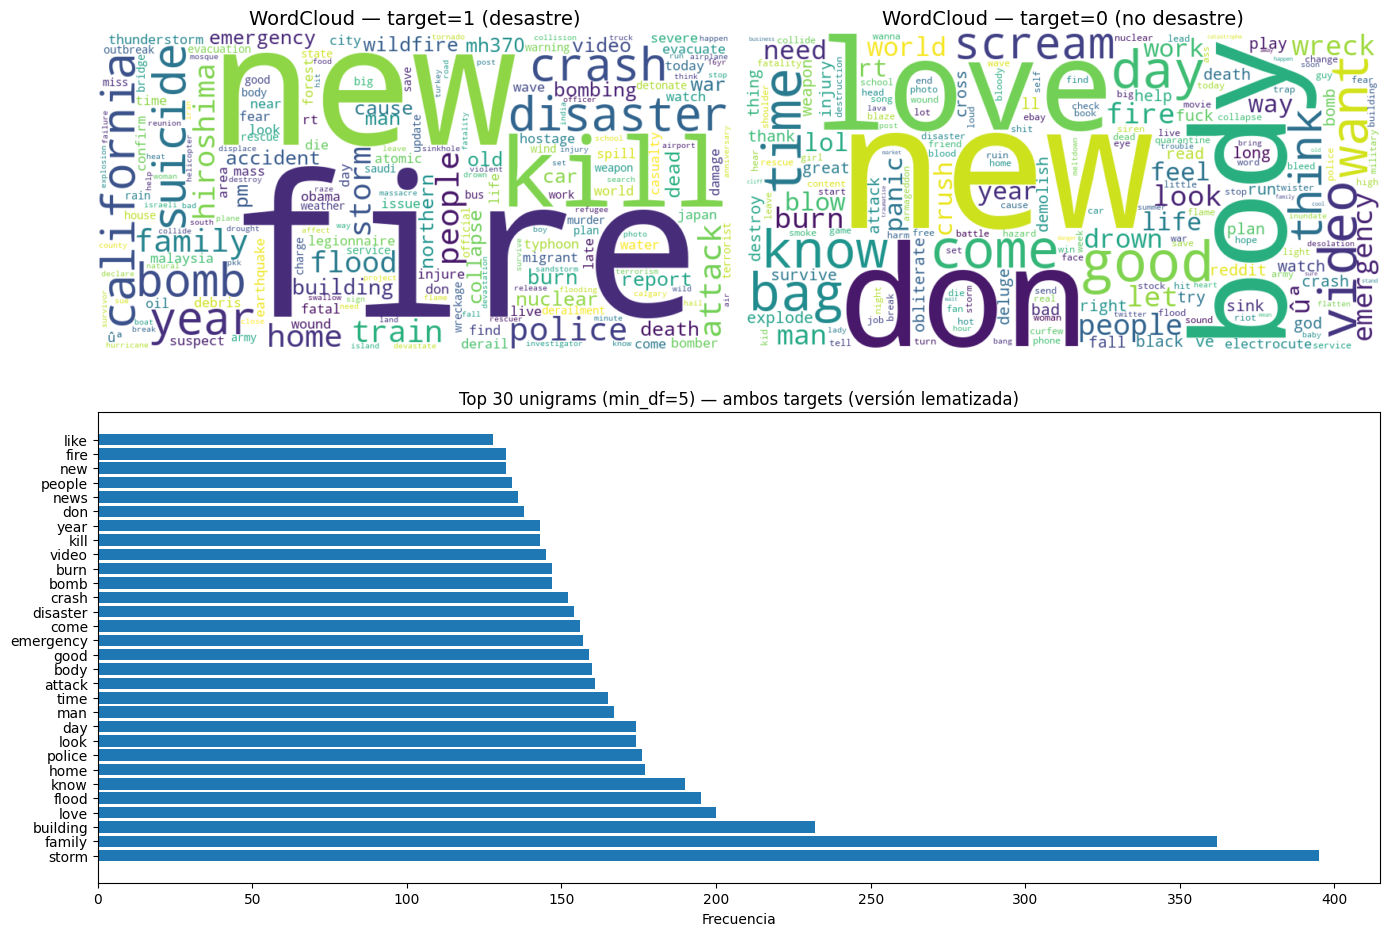

In [ ]:
# WordClouds para target=1 vs target=0 + top-terms barplot
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# instalar wordcloud si no existe
try:
    from wordcloud import WordCloud, STOPWORDS
except Exception:
    print("Instalando wordcloud... (puede tardar unos segundos)")
    !pip install -q wordcloud
    from wordcloud import WordCloud, STOPWORDS

col = 'clean_text_lem' if 'clean_text_lem' in df.columns else 'clean_text'
texts1 = " ".join(df.loc[df.target==1, col].astype(str).tolist())
texts0 = " ".join(df.loc[df.target==0, col].astype(str).tolist())

# Generar cloud
wc_params = dict(width=800, height=400, background_color='white', stopwords=set(STOPWORDS), collocations=False)
wc1 = WordCloud(**wc_params).generate(texts1)
wc0 = WordCloud(**wc_params).generate(texts0)

plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud — target=1 (desastre)', fontsize=14)

plt.subplot(2,2,2)
plt.imshow(wc0, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud — target=0 (no desastre)', fontsize=14)

vec = CountVectorizer(ngram_range=(1,1), token_pattern=r'\b\w+\b', min_df=5)
X = vec.fit_transform(df[col].astype(str))
sums = X.sum(axis=0).A1
terms = vec.get_feature_names_out()
top_n = 30
top_idx = sums.argsort()[::-1][:top_n]
top_terms = terms[top_idx]
top_counts = sums[top_idx]

plt.subplot(2,1,2)
plt.barh(range(top_n)[::-1], top_counts[::-1])
plt.yticks(range(top_n), top_terms[::-1])
plt.xlabel('Frecuencia')
plt.title('Top 30 unigrams (min_df=5) — ambos targets (versión lematizada)')
plt.tight_layout()
plt.show()
